## Part I - (Fordgobike Data Exploration )
## by Malb

## Introduction
> This is the exploration of February 2019 user data for fordgobike located in the greater San Francisco Bay Area. Fordgobike is a bikesharing system allowing users to rent bikes based on their needs with the ability to subscribe or take advantage of one time usage. This dataset includes 16 features and 183,412 rows. 




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import median
import calendar
import time
import math
import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [23]:
!pip install seaborn==0.11.2

In [24]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [25]:
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [26]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [27]:
# exploring bikeshare for all trip column? 
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [28]:
# explore gender

if 'member_gender' in(df.columns):
        print(df['member_gender'].value_counts())


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64


In [29]:
# take a look at the columns in df

list(df)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

In [30]:
# assessing for duplicate values 

df.duplicated().sum()

0

In [31]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [32]:
# how many unique values in initial columns of interest

df[["start_station_name",
 "end_station_name",
 "bike_id",
 "user_type",
 "member_gender",
 "bike_share_for_all_trip"]].nunique()

start_station_name          329
end_station_name            329
bike_id                    4646
user_type                     2
member_gender                 3
bike_share_for_all_trip       2
dtype: int64

In [33]:
# how many stations are there?
df.start_station_name.nunique()

329

In [34]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [35]:
# explore birth year vs duration of trip

df[["member_birth_year", "duration_sec"]].describe()

,member_birth_year,duration_sec
count,175147.000000,183412.000000
mean,1984.806437,726.078435
std,10.116689,1794.389780
min,1878.000000,61.000000
25%,1980.000000,325.000000
50%,1987.000000,514.000000
75%,1992.000000,796.000000
max,2001.000000,85444.000000


In [36]:
# based on the mix in birth year, I am curious to see when ages that are above the median ride vs the majority

### What is the structure of your dataset?

> There are 183412 rows and 16 columns that give user information for ( 'duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip'). 
 
> The majority of the variables are numerical, however there are some categorical values for the users like customer vs. subscriber as an example. 

### What is/are the main feature(s) of interest in your dataset?

> I am curious about the length of trips, are they longer or shorter overall. It will also be interesting to see if age or user type played a factor in the length of rides. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> User birth year, their subscriber type and trip duration.

In [39]:
# Cleaning phase 

# copy dataframe, fix data types
df_clean = df.copy

df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')



TypeError: 'method' object is not subscriptable

In [23]:
df['start_time'] = pd.to_datetime(df['start_time'])
#df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
#df['start_month_cal'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])


#df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
#df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [24]:
# adding in new columns

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

# end time columns 
#df_clean['duration_minute'] = df_clean['duration_sec']/60
#df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
#df_clean['start_hourofday'] = df_clean.start_time.dt.strftime('%H')
#df_clean['start_dayofweek'] = df_clean.start_time.dt.strftime('%A')
#df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')


In [25]:
df_clean['start_hour'] = df_clean['start_time'].apply(lambda time: time.hour)
df_clean['period_day'] = 'morning'
df_clean['period_day'][(df_clean['start_hour'] >= 12) & (df_clean['start_hour'] <= 17)] = 'afternoon'
df_clean['period_day'][(df_clean['start_hour'] >= 18) & (df_clean['start_hour'] <= 23)] = 'night'

In [26]:
# checking results of period day creation
print(df_clean['start_hour'].value_counts())
print(df_clean['period_day'].value_counts())

17    21864
8     21056
18    16827
9     15903
16    14169
7     10614
19     9881
15     9174
12     8724
13     8551
10     8364
14     8152
11     7884
20     6482
21     4561
6      3485
22     2916
23     1646
0       925
5       896
1       548
2       381
4       235
3       174
Name: start_hour, dtype: int64
afternoon    70634
morning      70465
night        42313
Name: period_day, dtype: int64


In [27]:
# convert time period, month, and weekday into ordered categorical types
cat_dict = {'start_month': ['Feb'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_dayofweek': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in cat_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = cat_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [69]:
# list of numeric variables and categorical variables for exploration

numeric_vars = ['age','duration_minute']
times_chr = ['period_day','start_dayofweek']
users_chr = ['user_type','member_gender']

In [28]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 25 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null object
start_station_id           183412 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183412 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null object
start_month_num            183412 non-null int64
start_month_cal         

# Part I - (Dataset Exploration Title)
## by Malb

## Introduction
> This is the exploration of 2019 user data for fordgobike located in San Francisco. This dataset includes 16 features and 183,412 lines

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [29]:
df_clean['age'] = df_clean['member_birth_year'].apply(lambda x:2019 - x)

In [89]:
#drop columns I will not be using for analysis

df_clean.drop([
 'start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'bike_id','start_station_latitude',
 'start_station_longitude',
 'end_station_latitude',
 'end_station_longitude'], axis=1, inplace=True)

In [90]:
#confirm drops

list(df_clean)

['duration_sec',
 'start_time',
 'end_time',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'start_month_num',
 'start_month_cal',
 'start_date',
 'start_hourofday',
 'start_dayofweek',
 'start_month',
 'duration_minute',
 'start_hour',
 'period_day',
 'age']

In [ ]:
df_clean.head()

In [94]:
df_clean.describe()

,duration_sec,member_birth_year,start_month_num,duration_minute,start_hour,age
count,183412.000000,175147.000000,183412.0,183412.000000,183412.000000,175147.000000
mean,726.078435,1984.806437,2.0,12.101307,13.458421,34.193563
std,1794.389780,10.116689,0.0,29.906496,4.724978,10.116689
min,61.000000,1878.000000,2.0,1.016667,0.000000,18.000000
25%,325.000000,1980.000000,2.0,5.416667,9.000000,27.000000
50%,514.000000,1987.000000,2.0,8.566667,14.000000,32.000000
75%,796.000000,1992.000000,2.0,13.266667,17.000000,39.000000
max,85444.000000,2001.000000,2.0,1424.066667,23.000000,141.000000


## Univariate Exploration

> **Question**: How are many users are customers vs. subscribers? 


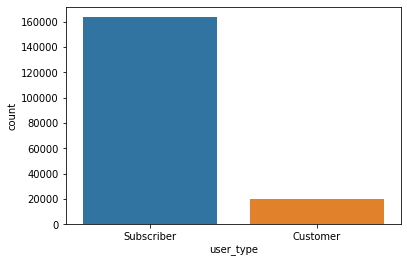

In [30]:
#countplot
user_cat_order = df_clean['user_type'].value_counts().index
sb.countplot(data = df_clean, x = 'user_type', order = user_cat_order);

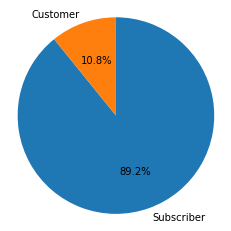

In [31]:
# reviewer recommended showing data in different format for more clarity

# pie chart

sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square');

> **Answer**: 89.2% of users are subscribers


> **Question**: how long are most rides?

Text(0.5, 1.0, 'Trip duration in Minutes')

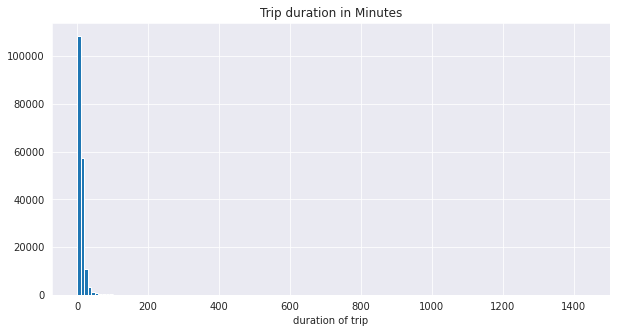

In [87]:
# histogram to review length of rentals in minutes

plt.figure(figsize=[10,5])
bin_edges = np.arange(0, df_clean.duration_minute.max()+10, 10)
plt.hist(data = df_clean, x = 'duration_minute', bins = bin_edges)
plt.xlabel('duration of trip');
plt.title('Trip Duration in Minutes')

> reviewer recommend adjusting chart to better see the lengths of rides

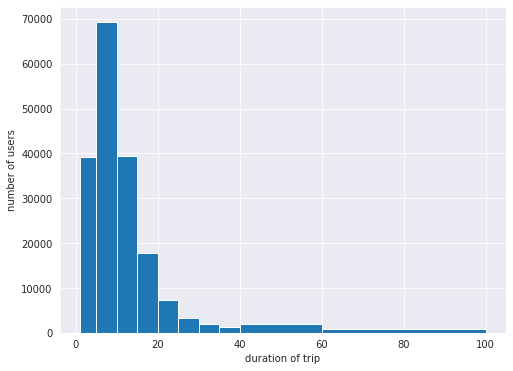

Text(0.5, 1.0, 'Trip duration in Minutes')

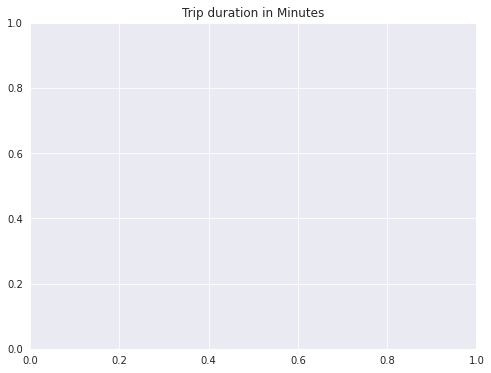

In [86]:
# histogram

plt.hist(data = df_clean, x = 'duration_minute', bins=[1,5,10,15,20,25,30,35,40,60,100])
plt.xlabel('duration of trip')
plt.ylabel('number of users')
plt.show()
plt.title('Trip Duration in Minutes')

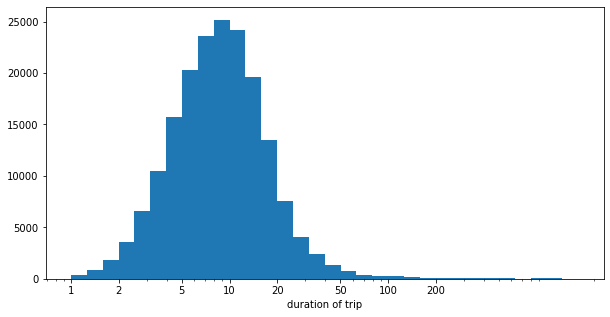

In [35]:
# since duration has a long tail,  we implement the log scale

plt.figure(figsize=[10,5])
bin_edges = 10 ** np.arange(0.0, np.log10(df_clean.duration_minute.max())+0.1, 0.1)
plt.hist(data = df_clean, x = 'duration_minute', bins = bin_edges)
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('duration of trip');
plt.title('Trip duration in Minutes')

> **Answer**: It appears that most trips fall below the 20 minute mark

> **Question**: If most trips are subscribers, are they happening in the morning, afternoon, or evening?

Text(0.5, 1.0, 'Ridership by Time of Day')

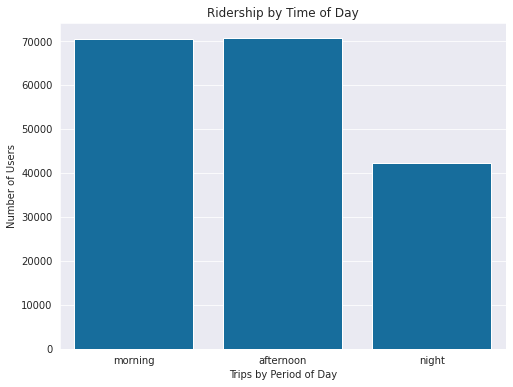

In [85]:
# what time of day are most trips taking place?

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df_clean, x='period_day', color=base_color);
plt.xlabel('Trips by Period of Day');
plt.ylabel('Number of Users');
plt.title('Ridership by Time of Day')

> **Answer**: It appears that majority of trips take place in the morning and afternoon. 

> **Question**: How do user types compare period of day?

Text(0.5, 1.0, 'User Type Ridership by Time of Day')

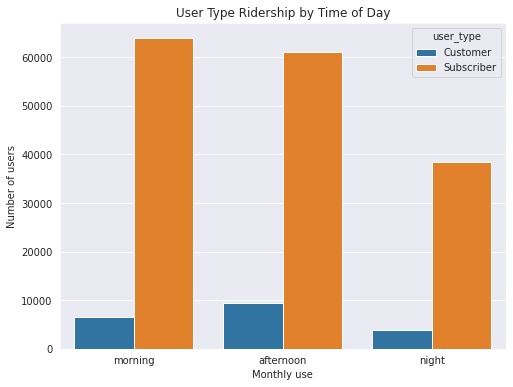

In [84]:
# countplot

sb.countplot(data=df_clean, x='period_day', hue='user_type');
plt.xlabel('Monthly use');
plt.ylabel('Number of users');
plt.title('User Type Ridership by Time of Day')


> **Answer**: Subscribers are dominating the morning and afternoon timeframes. It is interesting to see that both customers and subscribers have usage drop during night. 

In [53]:
list(df_clean)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'start_month_num',
 'start_month_cal',
 'start_date',
 'start_hourofday',
 'start_dayofweek',
 'start_month',
 'duration_minute',
 'start_hour',
 'period_day',
 'age']

> **Question**: Are most users male, female, or other? 

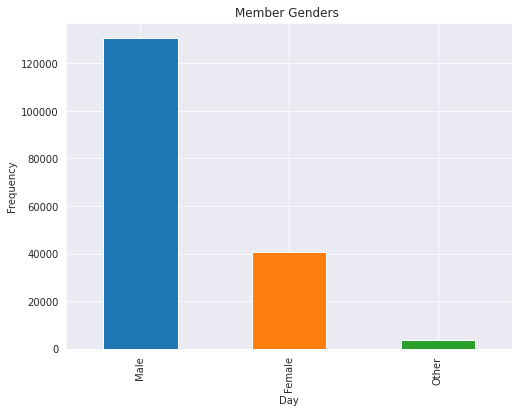

In [63]:
# bar chart
df_clean.member_gender.value_counts().plot('bar')
plt.title("Member Genders")
plt.xlabel('Gender')
plt.ylabel('User Count');

> **Answer**: Over 120,000 of the users are male.  

> **Question**: Is there a popular rental hour for each gender? 

Text(0.5, 1.0, 'Member Gender Ridership by Hour')

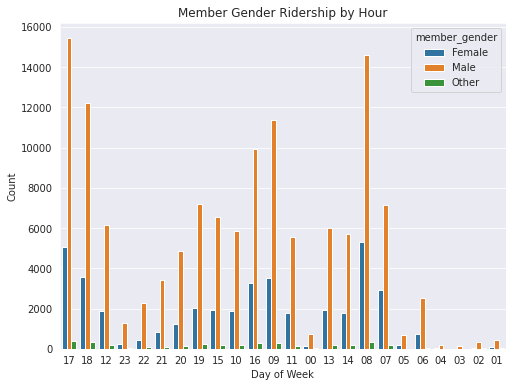

In [83]:
sb.countplot(data=df_clean, x='start_hourofday', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('Member Gender Ridership by Hour')

> **Answer**: The most popular hour for both Male is 17:00 which is afternoon and Female is 08:00 which is morning. However both saw a peak n ridership during both times. 

In [80]:
print('The most common start hour is : {}'.format(df_clean['start_hour'].mode()[0]))

The most common start hour is : 17


## Bivariate Exploration 

> **Question**: We've established that most users are subscribers. Working age into the analysis to see if age plays a factor.

Text(0.5, 1.0, 'Age Distribution by Subscriber Type')

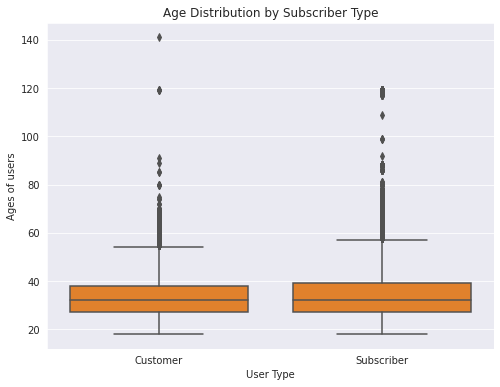

In [82]:
sb.boxplot(data=df_clean, x='user_type', y='age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Ages of users');
plt.title('Age Distribution by Subscriber Type')

In [40]:
# visual review of the data uncovers an outlier in age with a user above 100. Since that is most likely unsual, lets filter in order to see distribution better

df_clean_3 = df_clean.query('age <= 70')

df_clean_3['member_birth_year'] = df_clean_3['member_birth_year'].astype('int')
df_clean_3['age'] = df_clean_3['age'].astype('int')
df_clean_3.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174572 entries, 0 to 183411
Data columns (total 26 columns):
duration_sec               174572 non-null int64
start_time                 174572 non-null datetime64[ns]
end_time                   174572 non-null object
start_station_id           174572 non-null object
start_station_name         174377 non-null object
start_station_latitude     174572 non-null float64
start_station_longitude    174572 non-null float64
end_station_id             174572 non-null object
end_station_name           174377 non-null object
end_station_latitude       174572 non-null float64
end_station_longitude      174572 non-null float64
bike_id                    174572 non-null object
user_type                  174572 non-null category
member_birth_year          174572 non-null int64
member_gender              174572 non-null category
bike_share_for_all_trip    174572 non-null object
start_month_num            174572 non-null int64
start_month_cal           

In [81]:
df_clean_3.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_month_num,duration_minute,start_hour,age
count,174572.000000,174572.000000,174572.000000,174572.000000,174572.000000,174572.000000,174572.0,174572.000000,174572.000000,174572.000000
mean,704.469039,37.770789,-122.351278,37.770984,-122.350853,1984.964261,2.0,11.741151,13.458390,34.035739
std,1643.615498,0.101116,0.118494,0.101024,0.118058,9.712795,0.0,27.393592,4.735103,9.712795
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1949.000000,2.0,1.016667,0.000000,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,2.0,5.383333,9.000000,27.000000
50%,511.000000,37.780760,-122.398279,37.781010,-122.397405,1987.000000,2.0,8.516667,14.000000,32.000000
75%,789.000000,37.797320,-122.282497,37.797673,-122.285171,1992.000000,2.0,13.150000,17.000000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,2.0,1409.133333,23.000000,70.000000


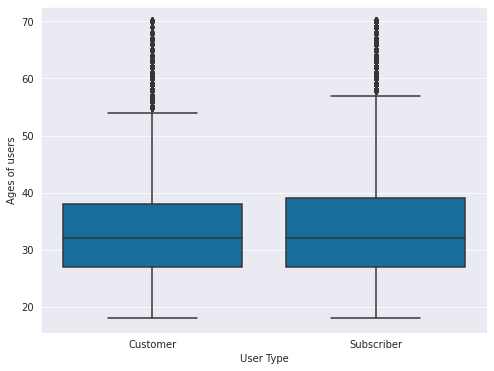

In [41]:
# re-plot of filtered df with age data under 70
sb.boxplot(data=df_clean_3, x='user_type', y='age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Ages of users');
plt.title('Age Distribution by subscriber type')

> **Answer**: his data shows that most users above the average age are indeed customers, using the service more sparingly. 

> **Question**: Does age influence ridership by period of day vs majority of users?
> Using range based on 75% of ages falling below 40 and those above that mark
> Age > 41 vs Age <= 40 

In [42]:
# age range 
df_median_age = df_clean[df_clean.age<=40]
df_above_40 = df_clean[df_clean.age>= 41]

Text(0.5, 1.0, 'Age Distribution in Users Aged below 40')

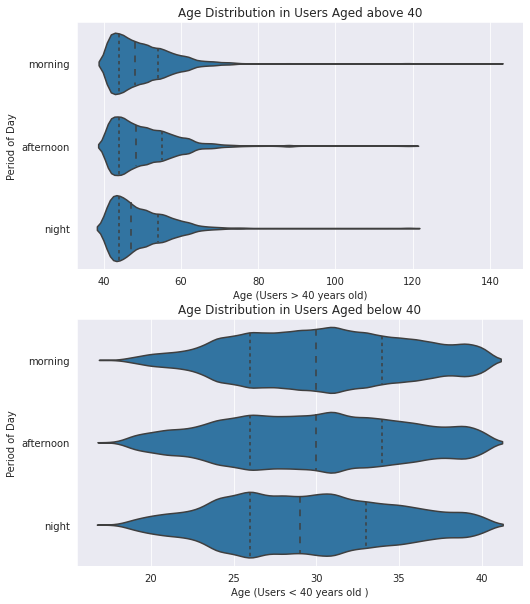

In [47]:
# violin plot

plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
ax = plt.subplot(211)
sb.violinplot(data=df_above_40, y='period_day', x='age', inner='quartile', color=base_color)
plt.xlabel('Age (Users > 40 years old)')
plt.ylabel('Period of Day')
plt.title('Age Distribution in Users Aged above 40')



ax = plt.subplot(212)
sb.violinplot(data=df_median_age, y='period_day', x='age', inner='quartile', color=base_color)
plt.xlabel('Age (Users < 40 years old )')
plt.ylabel('Period of Day')
plt.title('Age Distribution in Users Aged below 40')


> **Answer**: Interesting to see that users above the median age of 39 tend to use bikes earlier in morning or afternoon. 


### Distributions of data and features of interest

> The birthdate was converted into an age, making it easier to see the ages of users by subscription/customer. There was an outlier in the age, which skewed the plot so it was necessary to make a log transformation. 

> Overall the data seemed normally distributed for duration of trip as most centered around under 20 minutes.

> Interesting to observe positive correlation between period of day and duration of trip.

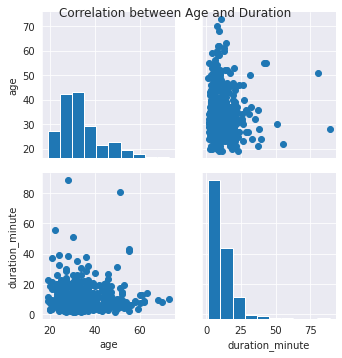

In [45]:
# pairgrid

samples = np.random.choice(df_clean.shape[0], 500, replace = False)
df_clean_samp = df_clean.loc[samples,:]

g = sb.PairGrid(data = df_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 10)
g.map_offdiag(plt.scatter)

g.fig.suptitle('Correlation between Age and Duration');

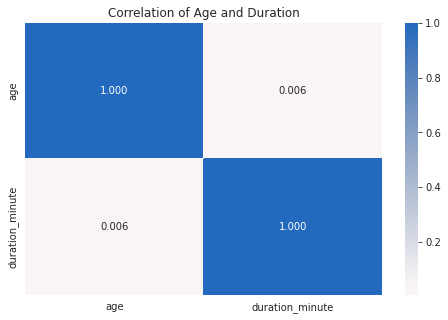

In [46]:
# heatmap

plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation of Age and Duration');

> **Answer**:  User age is indeed negatively correlated with length of trip. 

> Possibly due to 75% of users falling in the 30 - 40 age bracket 

## Multivariate Exploration



> **Question**:  Are customers utilizing bikes for longer periods of time vs. subscribers?

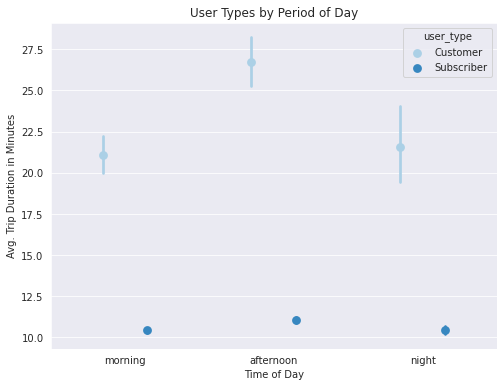

In [75]:
# pointplot

sb.pointplot(data=df_clean, x='period_day', y='duration_minute', hue='user_type', palette = 'Blues', dodge=0.3, linestyles="");
plt.title('User Types by Period of Day')
plt.xlabel('Time of Day');
plt.ylabel('Avg. Trip Duration in Minutes')
plt.show();

> **Answer**:  The graph above shows that customers tend to have longer rides in the afternoon. 

> Possibly due to tourism, or maybe being used as a one off alternative mode of transportation. 

> Subscribers tend to take quick trips at all times of day which makes sense as to why they are subscribers.

### Overall Observations of relationships between features of interest:  

> Seeing 89.2% of riders were subscribers was interesting, so it made me curious to know if perhaps they used it for longer timespans. While the average ride was short at 11.74 minutes, customers who were not subscribers took rides over 20 minutes.

> I would have thought that subscribers used the bikes for longer periods, but the visuals indicate that its more of a consistently short span and thus maybe being used for getting back and forth to daily activities.

### Were there any interesting or surprising interactions between features?

> When evaluating how age factored into the duration of trips, there was a negative correlation between ages above the median and duration length. So looking a bit further, you can see that those same ages are not subscribers. Could be one off rentals, tourists etc.

> Also, male and females peaked in ridership during the same hour of day which was 17:00 despite males makeup 71% of all users.

> Regardless of age, most users rode during the morning and afternoon.



## Conclusions
> Overall, usership seemed pretty steady as far as time of use and hours of use. There were no surprises in the lack of correlation in age and longer rides for example. When looking at time of day, it made sense that users dropped at night for a number of reasons but visibility and safety could also play a role. 

> Exploration started with the basics to see the shape of the data, the makeup of the users, what information was available and from there adjusting or adding columns for clarity. This allowed for digging further to answer secondary questions about the users, their ages, how long they rode, and the time of day. Y 
